<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106608 entries, 0 to 106607
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    106608 non-null  object 
 1   Total   106580 non-null  float64
 2   West    106580 non-null  float64
 3   East    106580 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.3+ MB


C:\Users\HRISHITA\AppData\Local\Temp\ipykernel_6576\511252923.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'])


Enter hour(0-23): 12
Enter day(1-31): 18
Enter month(1-12): 2
Enter year: 2003


C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediction for the given values: [[121.74037527]]
[[ 83.77445987]
 [125.49978942]
 [104.72452957]
 ...
 [138.18590986]
 [139.08796731]
 [116.97718349]]
89.77103105237063
R square value: 0.048300493725412785


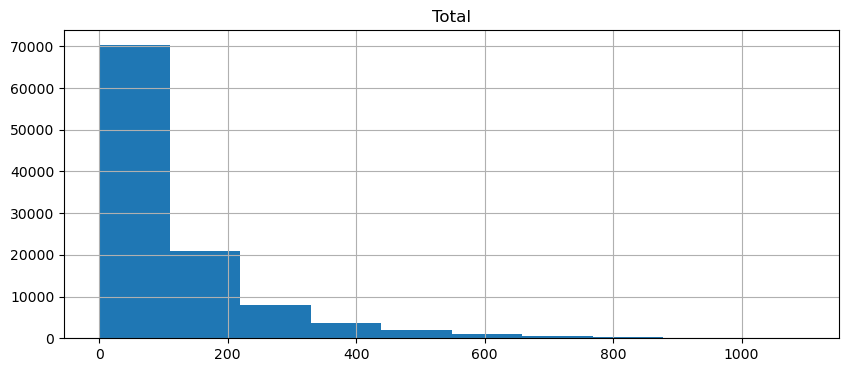

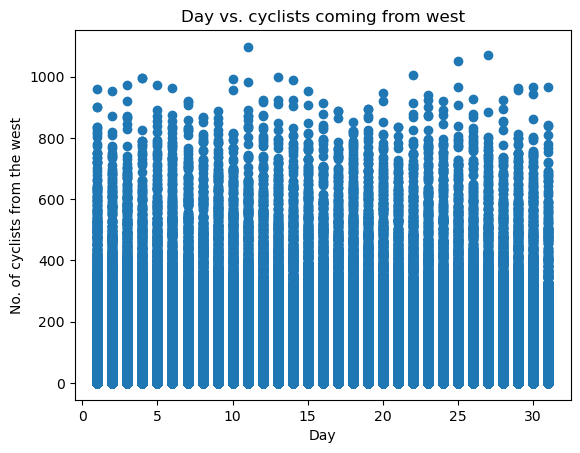

In [1]:
import pandas as pd
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df= pd.read_csv("Fremont_Bridge_Bicycle.csv")
df.head()

df.columns=["Date","Total", "West", "East"]

df.head()

df.info()

df.isnull().sum()

df= df.dropna()

df.isnull().sum()

df['Date']= pd.to_datetime(df['Date'])

df['Hour']= df['Date'].dt.hour
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df= df.drop(['Date'], axis=1)

df.head()

df= df.drop(['West','East'], axis=1)

X=df[['Hour', 'Day', 'Month', 'Year']]
y=df[['Total']]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 1)

model= LinearRegression()
model.fit(X_train, y_train)

hour= int(input("Enter hour(0-23):"))
day= int(input("Enter day(1-31):"))
month= int(input("Enter month(1-12):"))
year=int(input("Enter year:"))

input_val= np.array([[hour, day, month, year]])
predict= model.predict(input_val)
print("Prediction for the given values:", predict)

y_pred= model.predict(X_test)
print(y_pred)

from sklearn.metrics import mean_absolute_error

mae= mean_absolute_error(y_test, y_pred)
print(mae)

r_squared = model.score(X, y)
print("R square value:", r_squared)

features= ['Total']
df[features].hist(figsize=(10, 4))
plt.show()

plt.scatter(df['Day'], df['Total'])
plt.title("Day vs. cyclists coming from west")
plt.xlabel("Day")
plt.ylabel("No. of cyclists from the west")
plt.show()

The value for R-squared can range from 0 to 1 where:

0 indicates that the response variable cannot be explained by the predictor variable at all.
1 indicates that the response variable can be perfectly explained without error by the predictor variables.